从 torch 中导入 load，便于加载模型

从 sklearn.decomposition 导入 PCA，便于后续可视化

导入 matplotlib.pyplot 进行绘图

In [8]:
from torch import load
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

导入模型网络数据。其中 params 保存了全连接层的权重矩阵 $W$，hidden_layers 保存了隐藏层层数及大小

In [2]:
parameters = load("/root/upload/params1")
params = parameters[0]
hidden_layers = parameters[4]

Ws = []
for i in range(len(hidden_layers) + 1):
    Ws.append(params[i]['W'])

In [3]:
for w in Ws:
    print(w.shape)

(784, 200)
(200, 10)


先可视化 $W_1$。$W_1$ 的大小为 784 * 100，可以先做pca降到 784 * 10，再通过展示十张图片来进行可视化

In [6]:
W1 = Ws[0]
pca = PCA(n_components=10)
pca.fit(W1)
pca_W1 = pca.fit_transform(W1)

(784, 10)


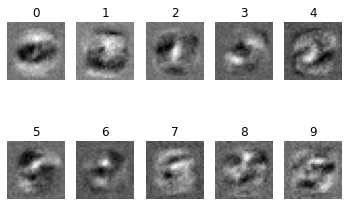

In [15]:
for i in range(pca_W1.shape[1]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(pca_W1[:, i].reshape(28, 28), cmap ='gray')
    plt.axis('off')
    plt.title(i)

plt.show()

$W_2$ 的大小为 200 * 10. 为了方便可视化，舍弃掉 4 行，变为 196 * 10，再进行展示

(196, 10)


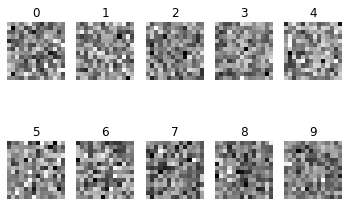

In [19]:
W2 = Ws[1]
W2 = W2[0:196, :]
print(W2.shape)
for i in range(W2.shape[1]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(W2[:, i].reshape(14, 14), cmap ='gray')
    plt.axis('off')
    plt.title(i)

plt.show()

对于第二个模型，采取类似的操作

In [29]:
parameters = load("/root/upload/params2")
params = parameters[0]
hidden_layers = parameters[4]

Ws = []
for i in range(len(hidden_layers) + 1):
    Ws.append(params[i]['W'])
for w in Ws:
    print(w.shape)

(784, 256)
(256, 128)
(128, 10)


可视化 $W_1$

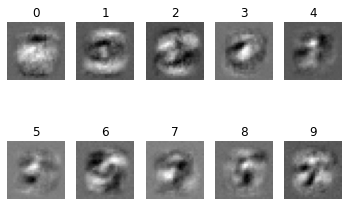

In [30]:
W1 = Ws[0]
pca = PCA(n_components=10)
pca.fit(W1)
pca_W1 = pca.fit_transform(W1)
for i in range(pca_W1.shape[1]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(pca_W1[:, i].reshape(28, 28), cmap ='gray')
    plt.axis('off')
    plt.title(i)

plt.show()

可视化 $W_2$. 降维到 256 * 3，通过 RGB 三通道可视化 16 * 16 的图片

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


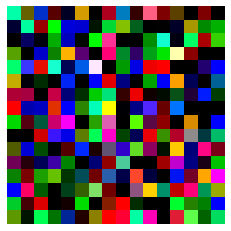

In [34]:
W2 = Ws[1]
pca = PCA(n_components=3)
pca.fit(W1)
pca_W1 = pca.fit_transform(W1)
plt.imshow(pca_W1.reshape(16, 16, 3))
plt.axis('off')
plt.show()

可视化 $W_3$. 展示十个 16 * 8 图像

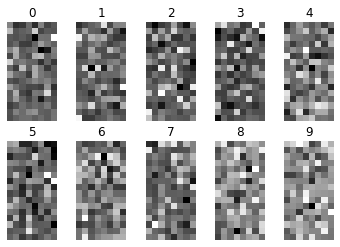

In [35]:
W3 = Ws[2]
for i in range(W3.shape[1]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(W3[:, i].reshape(16, 8), cmap ='gray')
    plt.axis('off')
    plt.title(i)

plt.show()